In [2]:
# Packages
using DynamicalSystems
using DifferentialEquations
using StaticArrays
E_ = x_ = y_ = -15..15
box = E_ × x_ × y_
using CairoMakie

In [381]:
# model
function model(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

model (generic function with 1 method)

In [1020]:
# fixed parametres
τ = 0.013; τD = 0.15; τy = 1.8;

α = 1.15; J = 3.07; β = 0.4375
U0 = 0.300; ΔU0 = 0.305
I0 = -1.4
xthr = 0.7; ythr = 0.3 # xthr = 0.7; ythr = 0.6 

0.3

In [1015]:
# parametres integrator
time = 500.0
transient_time = 500.0
tstep = 0.001
trange = range(0.0, time, step = tstep)
integrator_setting = (alg = RK4(), adaptive = false, dt = tstep);

 точка с цикла
[0.4549352693288164, 0.738072196707088, 0.4746303058865897]

In [1034]:
u0 = SA[0.7510789689284516, 0.9361889116240604, 0.7805673531155354] # SA[3.94198,   0.740845,  0.558679+0.1]
p = SA[α, τ, τD, τy, J, U0, ΔU0, β, I0]
ds = ContinuousDynamicalSystem(model, u0, p)

3-dimensional continuous dynamical system
 state:       [0.751079, 0.936189, 0.780567]
 rule f:      model
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, 0.3, 0.305, 0.4375, -1.4]

In [1017]:
# trajectory
sol = trajectory(ds, time, Δt = tstep; diffeq = integrator_setting);

In [1022]:
fp, eigs, stable = fixedpoints(ds, box)
for i in range(1, length(fp), step = 1)
    println("FP: $(fp[i])")
end
println("eigs: $eigs")

FP: [4.79547902552195, 0.6981643384939553, 0.3865228945630046]
FP: [2.287391072467786, 0.8281019786564683, 0.7310978260678809]
FP: [0.7510790410940349, 0.9361889642119561, 0.7805673526981889]
eigs: Vector{ComplexF64}[[-1.5935613608396746 + 0.0im, 6.06384601048677 - 7.8707575822982125im, 6.06384601048677 + 7.8707575822982125im], [-3.0477119207997507 + 0.0im, -0.5555555447531443 + 0.0im, 20.199060412190104 + 0.0im], [-9.948914367348458 - 4.5990826220485985im, -9.948914367348458 + 4.5990826220485985im, -0.55555555557653 + 0.0im]]


In [681]:
# time slice
ts = 1; tf = 200000;

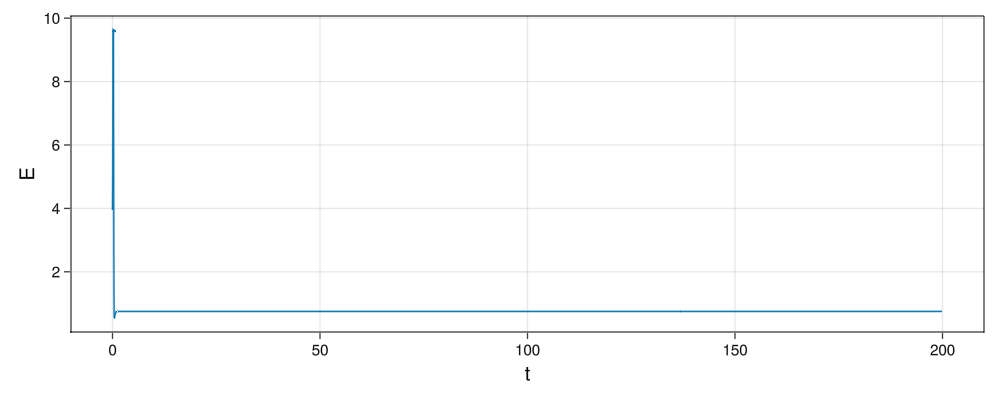

In [1035]:
# Timeseries
f = Figure(resolution = (1000, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "E", xlabelsize = 20, ylabelsize = 20, xticklabelsize = 15, yticklabelsize = 15)
lines!(axis, trange[ts:tf], sol[ts:tf, 1], label = "E")
f

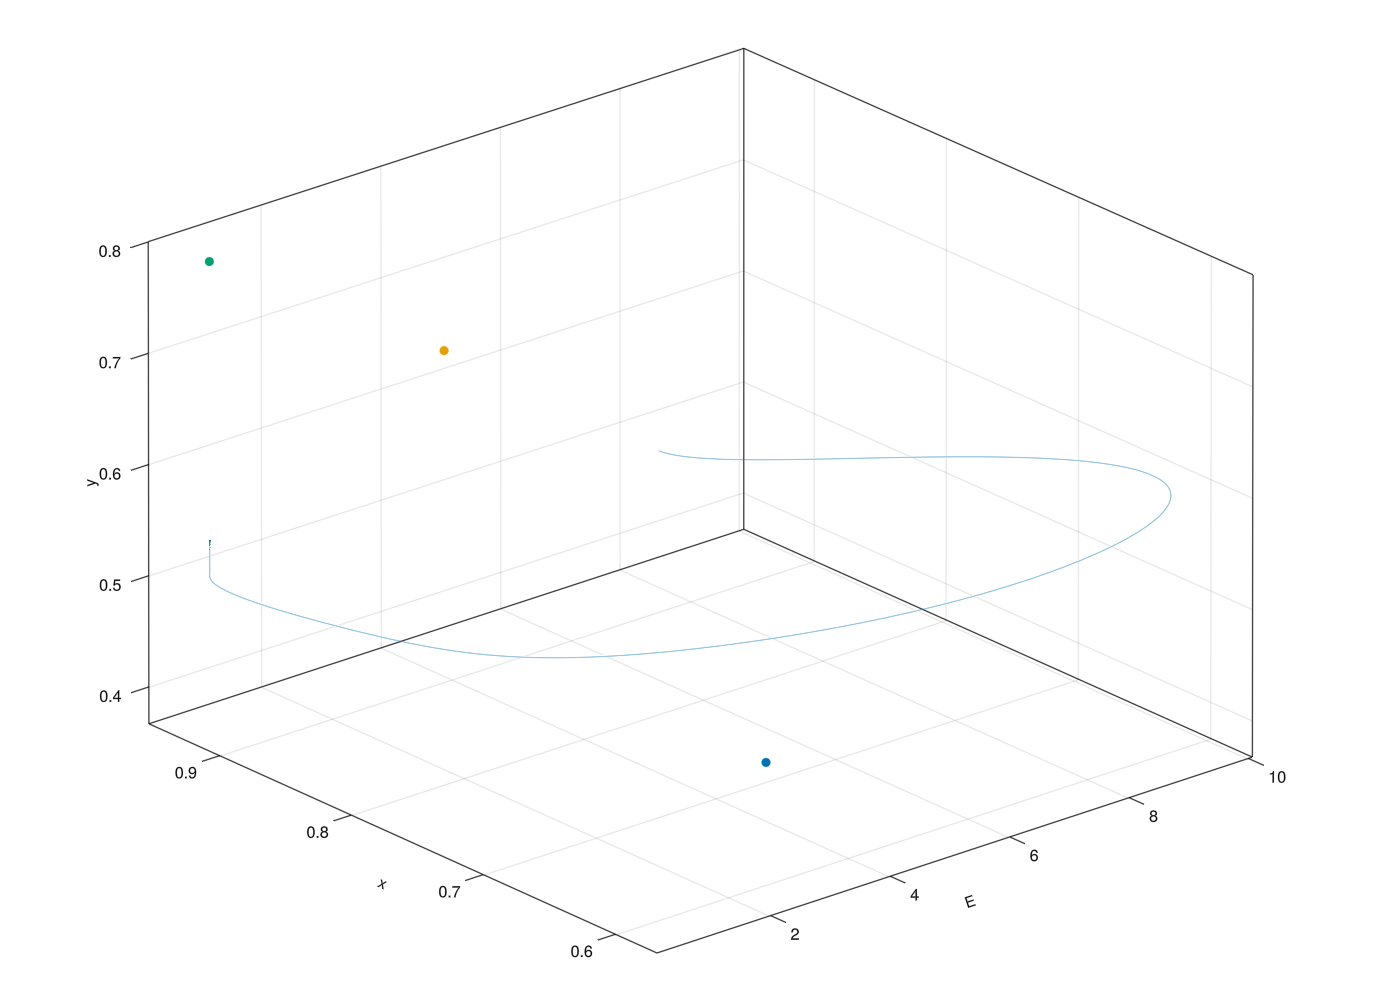

In [1036]:
# Phase porteit
f = Figure(resolution = (1400, 1000))
axis3 = Axis3(f[1, 1], xlabel = "E", ylabel = "x", zlabel = "y", xlabelsize = 15, ylabelsize = 15, zlabelsize = 15)
lines!(axis3, sol[:, 1],sol[:, 2],sol[:, 3], linewidth = 0.5)

for i in range(1, length(fp), step = 1)
    scatter!(axis3, fp[i][1], fp[i][2], fp[i][3])
end
f

### bifurcation diagram

In [25]:
u0 = SA[4.87682, 0.757812, 0.595674]
α = 1.15; I0 = -0.05
p = [α, τ, τD, τy, J, U0, ΔU0, β, I0]
ds = ContinuousDynamicalSystem(model, u0, p)

3-dimensional continuous dynamical system
 state:       [4.87682, 0.757812, 0.595674]
 rule f:      model
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, 0.3, 0.305, 0.4475, -0.05]

In [26]:
I0range = range( -0.05,-0.045, length = 10 )

transient_time = 2000.0
finish_time = 100.0
tstep = 0.001

setting_integrator = (alg = RK4(), adaptive = false, dt = tstep)

idx_control_parameter = 9

idx_fix = 1; fixed_value = 5.0
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-11, atol = 1e-11);

In [27]:
idx_save = 2
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = finish_time, Ttr = transient_time,
                        printparams = true,
                        diffeq = setting_integrator, rootkw = setting_root
                        );

parameter = -0.05
parameter = -0.049444444444444444
parameter = -0.04888888888888889
parameter = -0.04833333333333333


┌ Warning: For parameter -0.04888888888888889 The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\produce_orbitdiagram.jl:75


parameter = -0.04777777777777778

┌ Warning: For parameter -0.04833333333333333 The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\produce_orbitdiagram.jl:75



parameter = -0.04722222222222222

┌ Warning: For parameter -0.04777777777777778 The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\produce_orbitdiagram.jl:75



parameter = -0.04666666666666667


┌ Warning: For parameter -0.04722222222222222 The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\produce_orbitdiagram.jl:75


parameter = -0.04611111111111111

┌ Warning: For parameter -0.04666666666666667 The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\produce_orbitdiagram.jl:75



parameter = -0.04555555555555556


┌ Warning: For parameter -0.04611111111111111 The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\produce_orbitdiagram.jl:75


parameter = -0.045

┌ Warning: For parameter -0.04555555555555556 The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\produce_orbitdiagram.jl:75


┌ Warning: For parameter -0.045 The Poincaré surface of section did not have any points!
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\orbitdiagrams\produce_orbitdiagram.jl:75


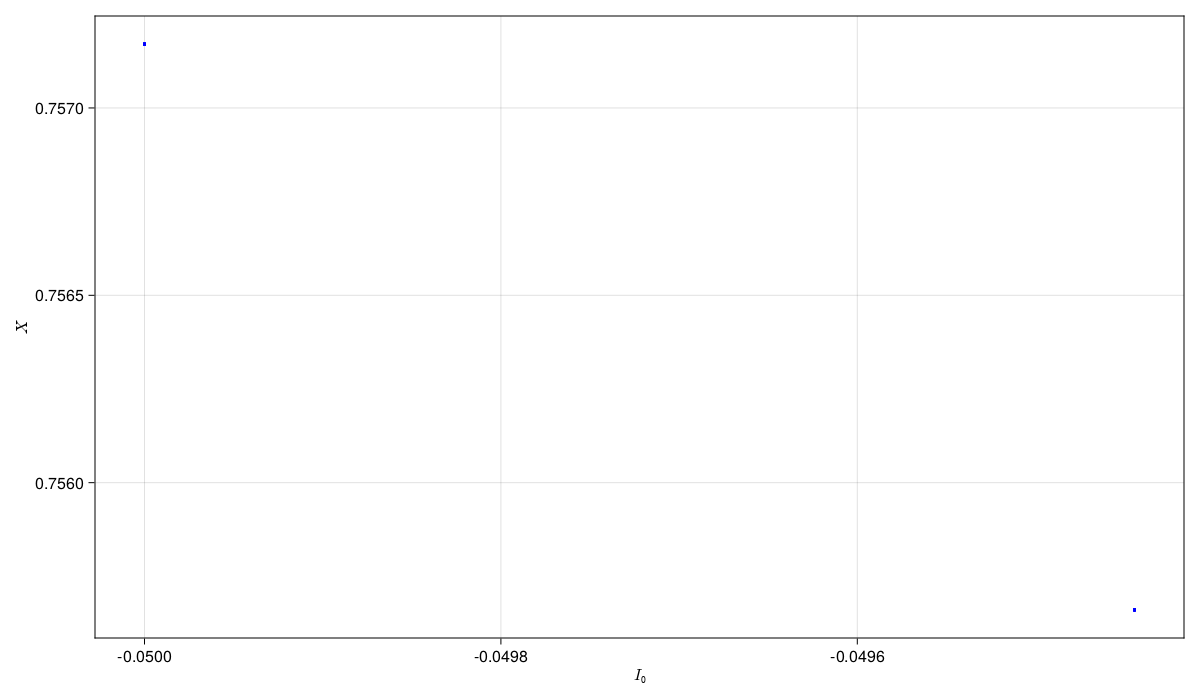

In [30]:
f = Figure(resolution = (1200, 700))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"X")
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("blue", 1.0), markersize = 3.0)
end
f